# credit_card_fraud_detection

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
import pandas as pd

# Load the train and test datasets from Excel files
train_df = pd.read_csv('D:/fraud_detection_dataset/fraudTrain.csv')
test_df = pd.read_csv('D:/fraud_detection_dataset/fraudTest.csv')

# Check the first few rows of the train and test data
train_df.head(), test_df.head()

# Check for missing values in both datasets
train_df.isnull().sum(), test_df.isnull().sum()



(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip                      0
 lat                      0
 long                     0
 city_pop                 0
 job                      0
 dob                      0
 trans_num                0
 unix_time                0
 merch_lat                0
 merch_long               0
 is_fraud                 0
 dtype: int64,
 Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip 

In [3]:
# Load the dataset
df = pd.read_csv('D:/fraud_detection_dataset/fraudTrain.csv')

# Step 1: Basic Preprocessing
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 'city', 'job', 'dob', 'trans_num'])

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
df['merchant'] = le.fit_transform(df['merchant'])
df['category'] = le.fit_transform(df['category'])
df['gender'] = le.fit_transform(df['gender'])
df['state'] = le.fit_transform(df['state'])

# Drop original lat/long columns to avoid redundancy
df = df.drop(columns=['lat', 'long', 'merch_lat', 'merch_long'])

# Step 3: Handle Imbalanced Data with SMOTE
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [4]:
# Step 3: Handle Imbalanced Data with SMOTE
from imblearn.over_sampling import SMOTE
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [5]:
# Step 4: Scale the Features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# Step 5: Train and Evaluate Models
# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_smote, y_train_smote)
y_pred_lr = lr.predict(X_test)

In [6]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_smote, y_train_smote)
y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[0 0 0 ... 0 0 0]


Feature Importance for Random Forest:


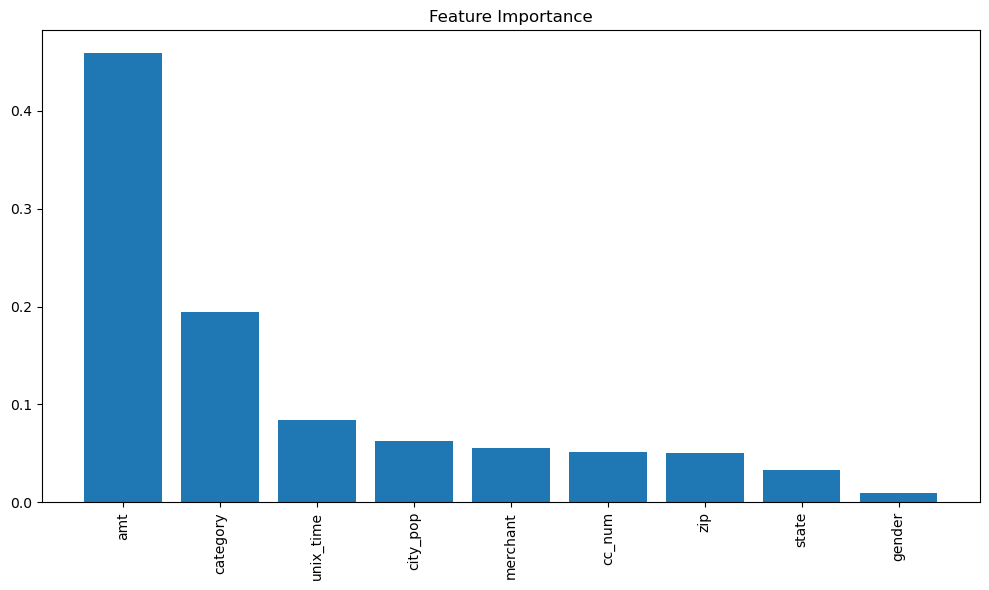

In [26]:
# 3. Feature Importance
def plot_feature_importance(model, feature_names):
    importance = model.feature_importances_
    sorted_idx = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importance)), importance[sorted_idx], align='center')
    plt.xticks(range(len(importance)), feature_names[sorted_idx], rotation=90)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

print("Feature Importance for Random Forest:")
plot_feature_importance(rf, X.columns)


In [18]:
# Step 6: Evaluate Models

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))



Logistic Regression Results:
Accuracy: 0.9487535427150211
[[244900  12934]
 [   356   1145]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    257834
           1       0.08      0.76      0.15      1501

    accuracy                           0.95    259335
   macro avg       0.54      0.86      0.56    259335
weighted avg       0.99      0.95      0.97    259335


Decision Tree Results:
Accuracy: 0.976825341739449
[[252171   5663]
 [   347   1154]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    257834
           1       0.17      0.77      0.28      1501

    accuracy                           0.98    259335
   macro avg       0.58      0.87      0.63    259335
weighted avg       0.99      0.98      0.98    259335



Confusion Matrix for Random Forest:


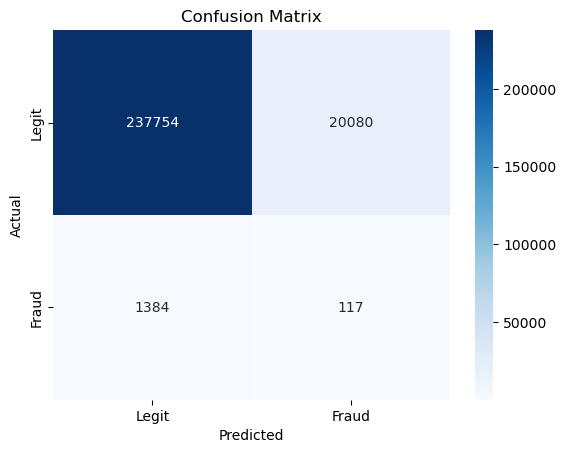

In [28]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc


# 1. Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

print("Confusion Matrix for Random Forest:")
plot_confusion_matrix(y_test, y_pred_rf)


